# 수행평가

## 1. 베이즈 이론 및 베이즈 분류기에 대해 설명하시오.

베이즈 이론 : 서로 반대의 결과를 갖는 두 원인이 사건을 발생시킬 때 두 원인중 하나의 확률을 구하는 방법.
사전확률을 통해 사후확률(조건부확률)을 구할 수 있는 것.<br>
<br>
베이즈 분류기 : 조건부 확률을 활용한 분류모델로 분류될 객체는 n개의 독립변수로 표현되며 베이즈 분류기는 이 독립변수를 이용하여 k개의 가능한 결과를 할당한다.

## 2. 이메일에 "나이트"라는 단어가 검출되었을 때의 스팸 확률을 수식으로 작성하시오(베이즈 이론 수식에서 사후확률을 기술하시오)

P(스팸|나이트) = P(스팸&나이트)/P(나이트)

사후확률 => P(나이트|스팸)*P(스팸)/P(나이트)

## 3. 나이브 베이지안 분류기가 응용되는 예를 드시오.

성별 분류기, 문서분류(스팸 분류)

## 4.4. abalone 데이터셋을 이용하여 다음 알고리즘을 바탕으로 성별(M/F)를 분류할 수 있는 모델을 만들고, 예측해보시오.
- 데이터 주소 : https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/
- abalone.data 다운로드
- 데이터 설명 : abalone.names
- training/test 데이터를 7:3의 비율로 분할(random_state 값은 모두 1008로 설정)
- 모델 생성후 test 데이터로 정확도 측정 및 출력
- 사용 알고리즘 종류 : SVM, 랜덤포레스트, 의사결정트리, knn
- 모든 알고리즘의 parameter 튜닝을 해주시기 바랍니다.
- 전처리 및 분석, 시각화 작업도 반드시 해주세요

In [1]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import MinMaxScaler

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# tuning
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("data/abalone.data", header=None,
                 names=["Sex","Length","Diameter_continuous","Height","Whole_weight",
                        "Shucked_weight","Viscera_weight","Shell weight","Rings"])
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### 컬럼설명<br>
Sex: male, female, infant<br>
Length: 가장 긴길이<br>
Diameter_continuous: 수직길이<br>
Height: 전복의 길이<br>
shucked_weight: 순수전복의 무게(껍질제외)<br>
Viscera_weight: 내장무게<br>
Rings: 전복 나이 (-1.5살)<br>

## 전처리 및 분석

In [3]:
df.describe()

,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


height 값이 0 인 데이터가 있음

결측치로 제거하자

In [4]:
df.drop(df[df.Height==0].index, axis=0, inplace =True)

In [5]:
df.Sex.value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

성별을 컬럼을 0,1,2로 바꿔주자

In [6]:
df.Sex = df.Sex.map({'M':0, 'F':1, 'I':2})

전복의 성별 나이 히스토그램

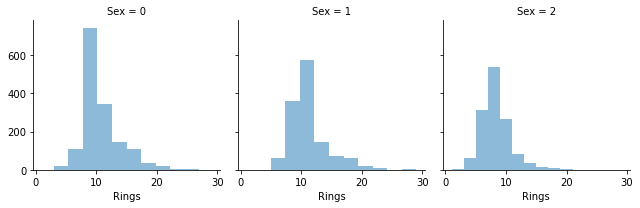

In [7]:
grid = sns.FacetGrid(df, col = "Sex")
grid.map(plt.hist, "Rings", alpha=0.5 )

<AxesSubplot:>

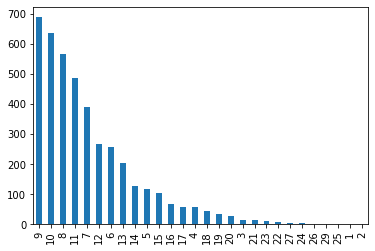

In [8]:
df["Rings"].value_counts().plot(kind="bar")

전복의 성별 길이, 무게

In [9]:
mean_by_sex = df.groupby("Sex").mean().reset_index()
mean_by_sex

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell weight,Rings
0,0,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
1,1,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
2,2,0.427828,0.326556,0.108157,0.431587,0.191123,0.092062,0.128026,7.891791


male,female의 가장 큰 차이는 내장의 무게, 껍데기의 무게로 보인다

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

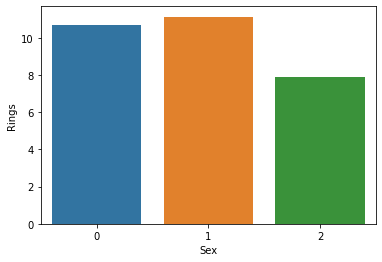

In [10]:
# plt.figure(figsize=(15,10))
sns.barplot(data=mean_by_sex, x="Sex", y="Rings")

전체적인 데이터의 분포를  살펴보자

<AxesSubplot:>

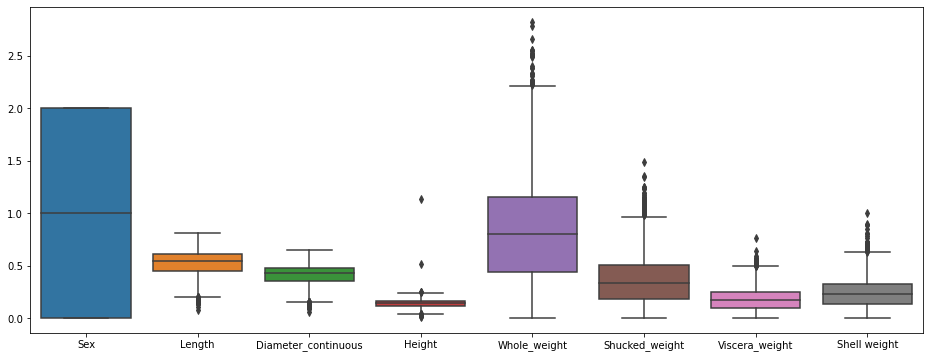

In [11]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df.drop("Rings",axis=1))

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4175.0,0.954970,0.827697,0.0000,0.00000,1.000,2.00000,2.0000
Length,4175.0,0.524065,0.120069,0.0750,0.45000,0.545,0.61500,0.8150
Diameter_continuous,4175.0,0.407940,0.099220,0.0550,0.35000,0.425,0.48000,0.6500
Height,4175.0,0.139583,0.041725,0.0100,0.11500,0.140,0.16500,1.1300
Whole_weight,4175.0,0.829005,0.490349,0.0020,0.44225,0.800,1.15350,2.8255
Shucked_weight,4175.0,0.359476,0.221954,0.0010,0.18625,0.336,0.50200,1.4880
Viscera_weight,4175.0,0.180653,0.109605,0.0005,0.09350,0.171,0.25300,0.7600
Shell weight,4175.0,0.238834,0.139212,0.0015,0.13000,0.234,0.32875,1.0050
Rings,4175.0,9.935090,3.224227,1.0000,8.00000,9.000,11.00000,29.0000


### 이상치제거

유독 튀는 height의 이상치를 제거하자


In [13]:
# np.percentile(df["Rings"].values, 25)

In [14]:
def get_outlier(df=None, column=None, weight=1.5):

    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [15]:
# df.columns
# col = ['Height', 'Whole_weight',
#        'Shucked_weight', 'Viscera_weight', 'Shell weight', 'Rings']

In [16]:
outlier_idx = get_outlier(df, column="Height", weight=1.5)
df.drop(outlier_idx, axis=0, inplace=True)

In [17]:
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


성별에 따른 boxplot

0 Length
1 Diameter_continuous
2 Height
3 Whole_weight
4 Shucked_weight
5 Viscera_weight
6 Shell weight
7 Rings


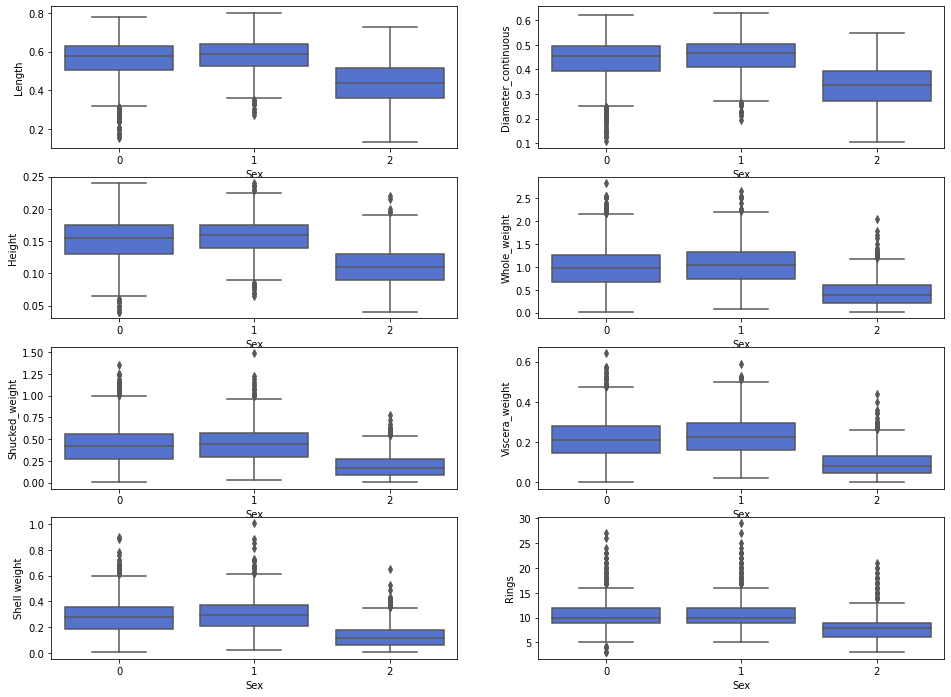

In [18]:
fig=plt.figure(figsize=(16,12))

for i, column_name in enumerate(df.columns[1:]):
    print(i,column_name)
    fig.add_subplot(4,2,i+1)
    sns.boxplot(data = df, x="Sex",y=column_name, color="royalblue")

Rings는 나이인데 female, male은 나이대가 같고 infant만 달라서 3구간으로 나누는게 나을것같다

In [29]:
df[df.Sex==0].describe()[["Rings"]]

,Rings
count,1525.000000
mean,10.708852
std,3.025562
min,3.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,27.000000


In [30]:
df[df.Sex==1].describe()[["Rings"]]

,Rings
count,1303.000000
mean,11.128933
std,3.105213
min,5.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,29.000000


In [31]:
df[df.Sex==2].describe()[["Rings"]]

,Rings
count,1320.000000
mean,7.955303
std,2.474183
min,3.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,21.000000


In [20]:
pd.qcut(df.Rings,3)

0         (11.0, 29.0]
1       (2.999, 8.333]
2        (8.333, 11.0]
3        (8.333, 11.0]
4       (2.999, 8.333]
             ...      
4172     (8.333, 11.0]
4173     (8.333, 11.0]
4174     (8.333, 11.0]
4175     (8.333, 11.0]
4176      (11.0, 29.0]
Name: Rings, Length: 4148, dtype: category
Categories (3, interval[float64]): [(2.999, 8.333] < (8.333, 11.0] < (11.0, 29.0]]

In [33]:
df["Rings_band"] = np.where(df.Rings<9 , 0,
                           np.where(df.Rings<12,1,2))

In [34]:
df.drop("Rings", axis= 1, inplace=True)

### 어린 infant를 제외하고 암컷이 수컷보다 전체적인 면에서 조금씩 큰것을 확인할 수 있다

In [35]:
mask = np.triu(np.ones_like(df.corr(),dtype=bool))

<AxesSubplot:>

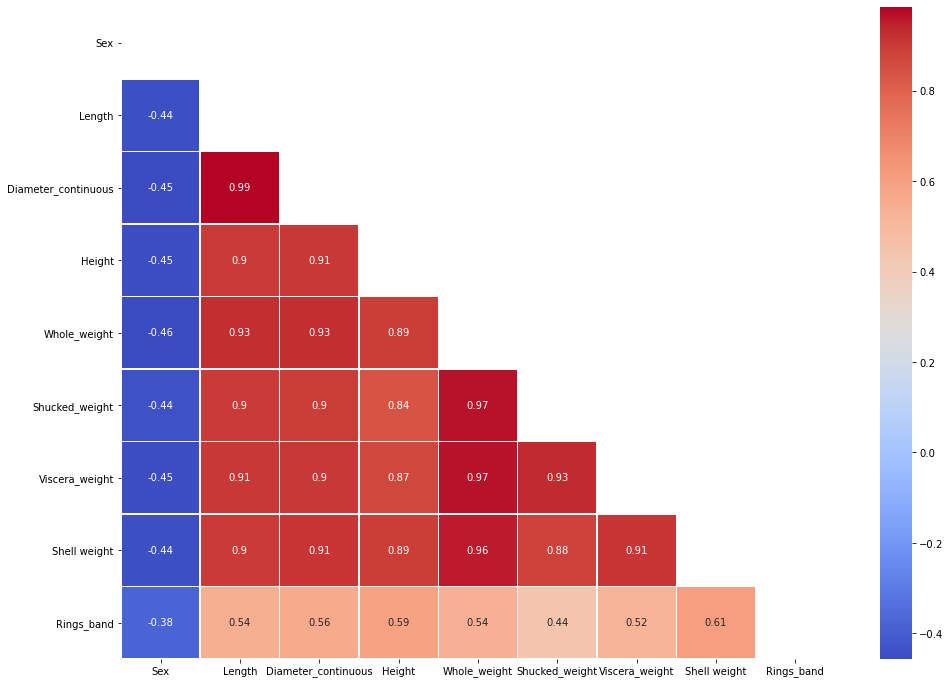

In [36]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True,
            mask=mask,linewidths=.5, cmap="coolwarm")

영유아인지 아닌지 컬럼도 만들자

In [37]:
df["is_infant"] = np.where(df.Sex==2,1,0)

In [38]:
df.head()

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell weight,Rings_band,is_infant
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2,0
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1


## 데이터 정규화

In [39]:
df = pd.get_dummies(df,columns=["Rings_band","is_infant"])

In [40]:
df

,Sex,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell weight,Rings_band_0,Rings_band_1,Rings_band_2,is_infant_0,is_infant_1
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1,1,0
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1,0,0,1,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,1,0,1,0
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1,0,1,0
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,1,0,1,0
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1,0,1,0
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1,0,1,0
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,1,0,1,0


In [435]:
# X = df[df.Sex!=2].drop(["Sex","is_infant_0","is_infant_1"],axis=1)
# y = df[df.Sex!=2]["Sex"]

In [41]:
X = df.drop("Sex", axis =1)
y = df["Sex"]

In [42]:
X

,Length,Diameter_continuous,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell weight,Rings_band_0,Rings_band_1,Rings_band_2,is_infant_0,is_infant_1
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1,0,0,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0,1,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,1,0,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0,1,0,1,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,1,0,1,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,1,0,1,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0,1,0,1,0


In [43]:
X_z = pd.DataFrame(MinMaxScaler().fit_transform(X),columns=df.columns[1:])

train, test 데이터 분리

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_z,y,test_size=0.3, random_state=1008)

## KNN

In [45]:
scores= []
for k in range(11,50,2):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_z,y, cv=10, scoring="accuracy")
    scores.append([score.mean(),k])
scores

[[0.6796018858040859, 11],
 [0.679117047901752, 13],
 [0.6750165880914963, 15],
 [0.67285140562249, 17],
 [0.675504336185321, 19],
 [0.669961003434026, 21],
 [0.6677917466969328, 23],
 [0.6742977707933181, 25],
 [0.675024154589372, 27],
 [0.6767114836156218, 29],
 [0.6755031721087247, 31],
 [0.6803241953320529, 33],
 [0.6759856818578661, 35],
 [0.6781543565566615, 37],
 [0.6786362842675048, 39],
 [0.6824963622606367, 41],
 [0.6820132704731973, 43],
 [0.6769483732029568, 45],
 [0.6844240731040102, 47],
 [0.6841860194400791, 49]]

<AxesSubplot:xlabel='1', ylabel='0'>

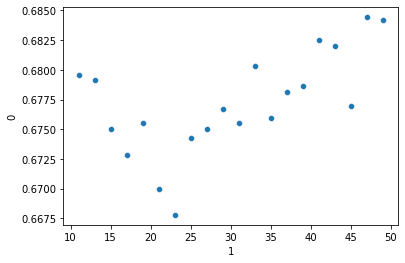

In [46]:
sns.scatterplot(data = pd.DataFrame(scores),x=1,y=0)

k=47 일때 가장 높게나왔다.

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=47)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)

print("정확도 : {:.2f}%".format(accuracy_score(pred, y_test)))

정확도 : 0.68%


## Decision Tree

In [61]:
dt_model = DecisionTreeClassifier()

dt_param_grid = {"max_depth": [5,6,7],
              "min_samples_split":[4,5,6],
              "min_samples_leaf":[2,3,4,5]}

In [62]:
gsDT = GridSearchCV(dt_model, param_grid=dt_param_grid, cv = 10, scoring="accuracy",n_jobs= -1, verbose = 1)
gsDT.fit(X_z,y)

DT_best = gsDT.best_estimator_
gsDT.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


0.689733426459461

In [63]:
DT_best

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=4)

In [64]:
DT_best.fit(X_train,y_train)
pred = DT_best.predict(X_test)
print("정확도 : {:.2f}%".format(accuracy_score(pred, y_test)))

정확도 : 0.69%


## RandomForest

In [86]:
rf_model = RandomForestClassifier()

rf_par_grid = {"n_estimators":[300,500],
               "max_features": [5,7],
              "min_samples_split":[6,7],
              "min_samples_leaf":[6,7]}

In [87]:
gsRFC = GridSearchCV(rf_model, param_grid=rf_par_grid, cv = 10, scoring="accuracy",n_jobs= -1, verbose = 1)
gsRFC.fit(X,y)

RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


0.6911861940515684

In [89]:
RFC_best

RandomForestClassifier(max_features=7, min_samples_leaf=7, min_samples_split=7,
                       n_estimators=500)

In [90]:
RFC_best.fit(X_train,y_train)
pred = RFC_best.predict(X_test)
print("정확도 : {:.2f}%".format(accuracy_score(pred, y_test)))

정확도 : 0.70%


## SVM

In [115]:
def svc_param_selection(x, y, nfolds):
    svm_parameters = [{"kernel":["rbf"],
                       "gamma":[0.12,0.13],
                       "C":[190,200]}]
    clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds)
    clf.fit(x, y)
    print(clf.best_params_)
    return clf

In [116]:
clf = svc_param_selection(X_train, y_train, 10)

{'C': 200, 'gamma': 0.12, 'kernel': 'rbf'}


In [117]:
clf.best_estimator_.fit(X_train,y_train)
pred = clf.best_estimator_.predict(X_test)
print("정확도 : {:.2f}%".format(accuracy_score(pred, y_test)*100))

정확도 : 72.05%
